In [1]:
import os,sys
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image
import sys
from skimage import io, color
from banding_pattern_extraction.scripts.chromosome_segmentation import get_segmented_chromosome

In [2]:

def color_segmentation(segmentation_inpt, mask, seg_color):
    rgb = cv2.cvtColor(segmentation_inpt,cv2.COLOR_GRAY2RGB)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    max_counter_len = 0
    c_id = 0
    
    for i in range(len(contours)):
        if len(contours[i]) > max_counter_len:
            c_id = i
            max_counter_len = len(contours[i])
    
    
    output = color.label2rgb(mask,
                              rgb,
                              colors=[seg_color],
                              alpha=0.01, bg_label=0, bg_color=None)
    
    

    return output
    

In [3]:
abnormal_type = '1qh+'
chrom_type = 'chr1'
gt_color = (29,227,227)


# abnormal_type = 'inv9_p12q13'
# chrom_type = 'chr9'
# gt_color = (232,232,10)

# abnormal_type = '9qh+'
# chrom_type = 'chr9'
# gt_color = (218,0,215)



## Visualize Structural Abnormal Samples

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


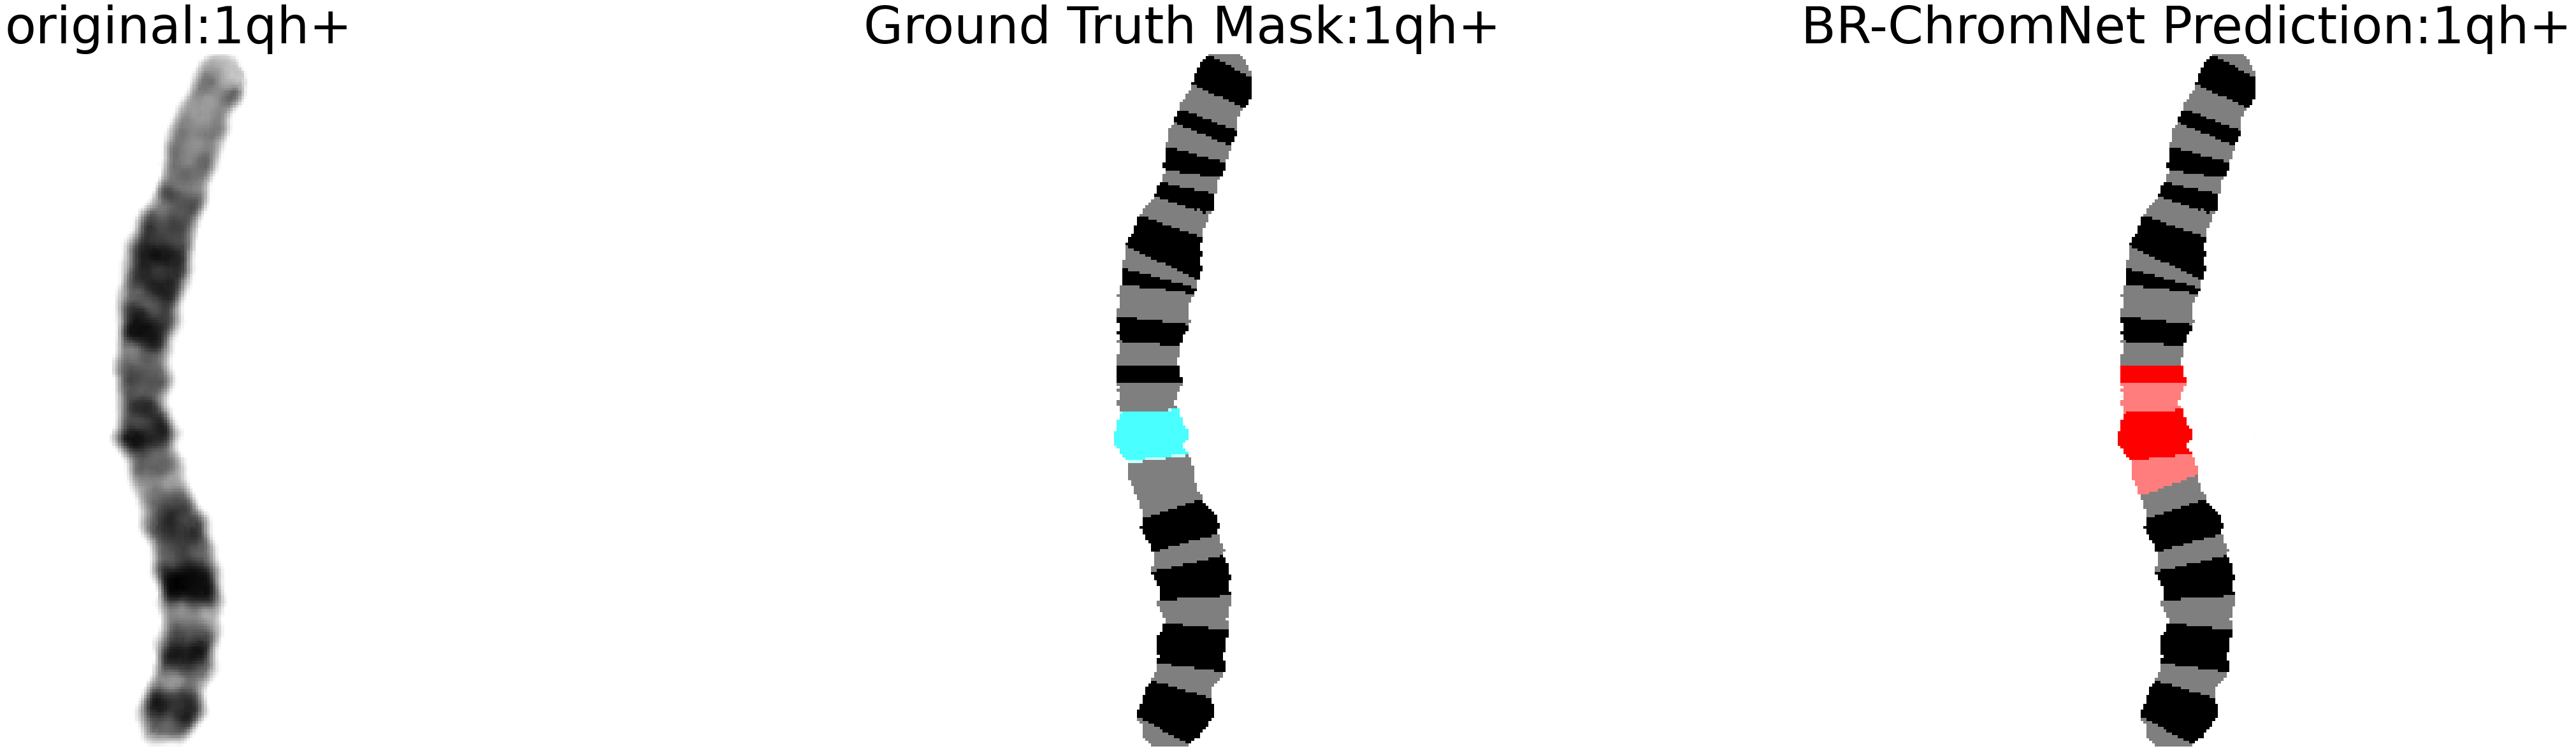

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


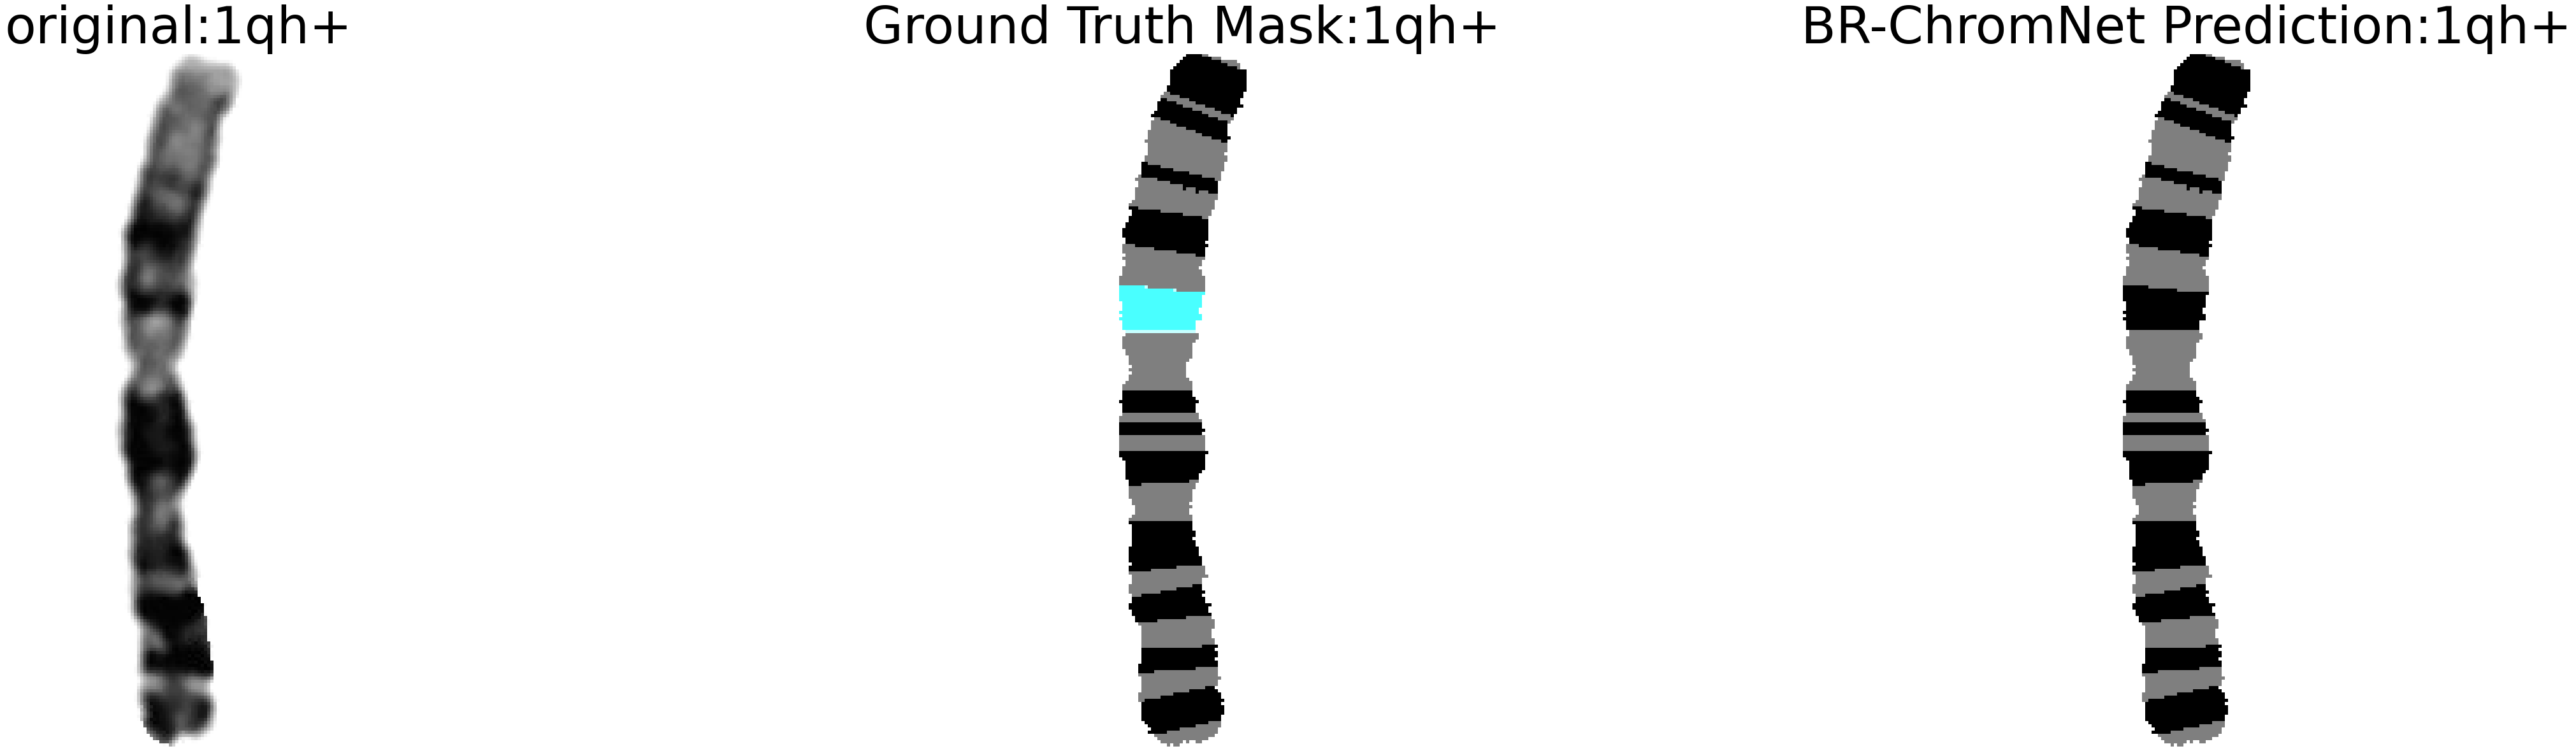

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


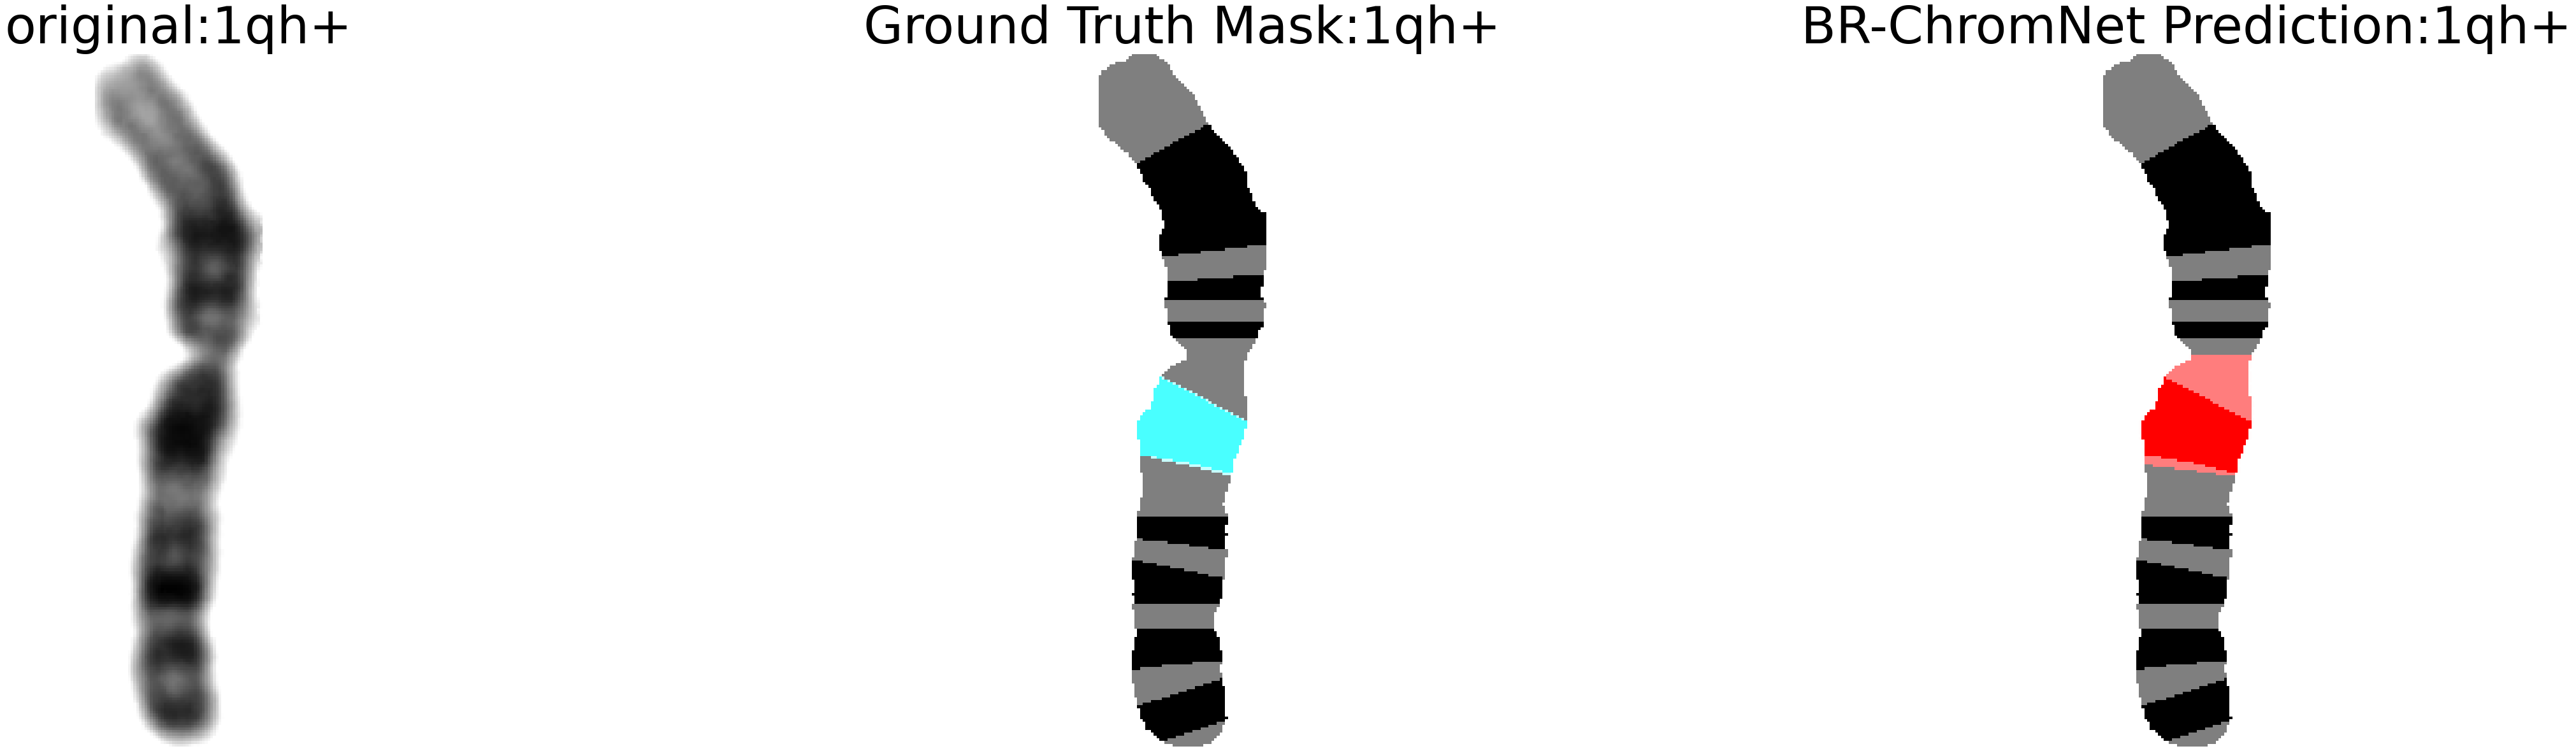

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


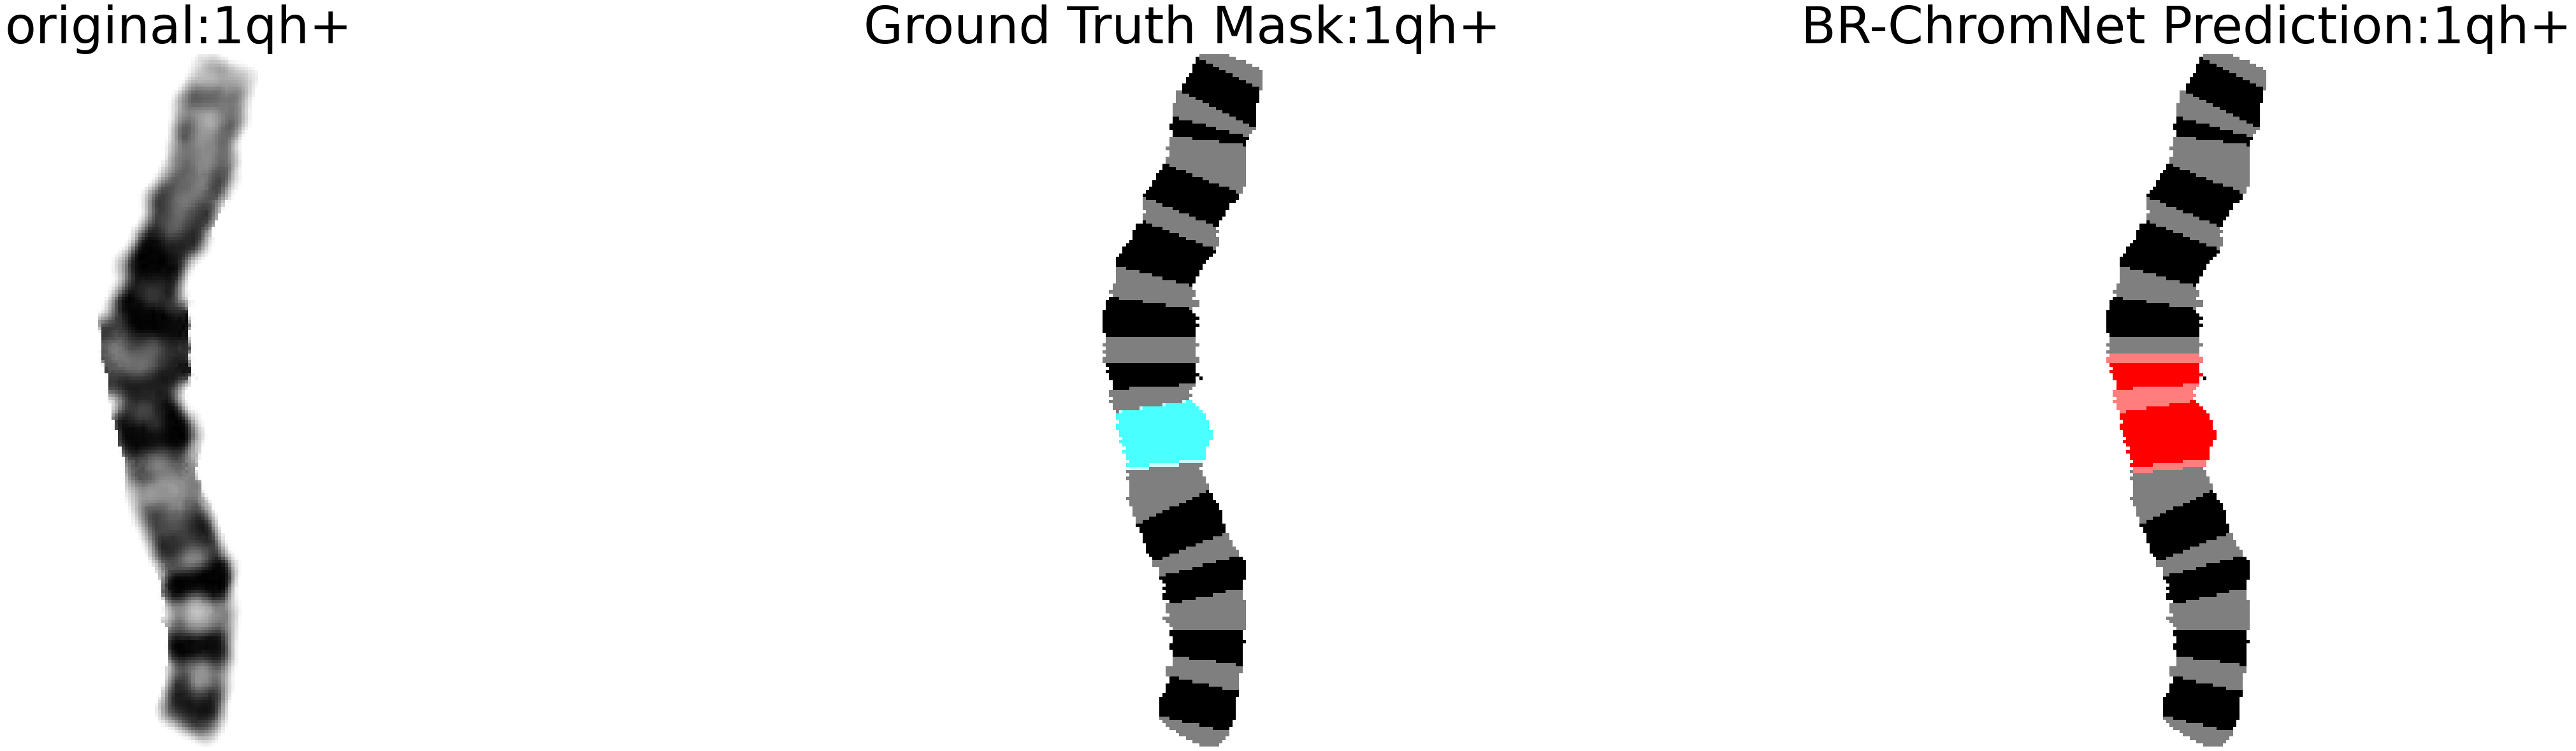

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


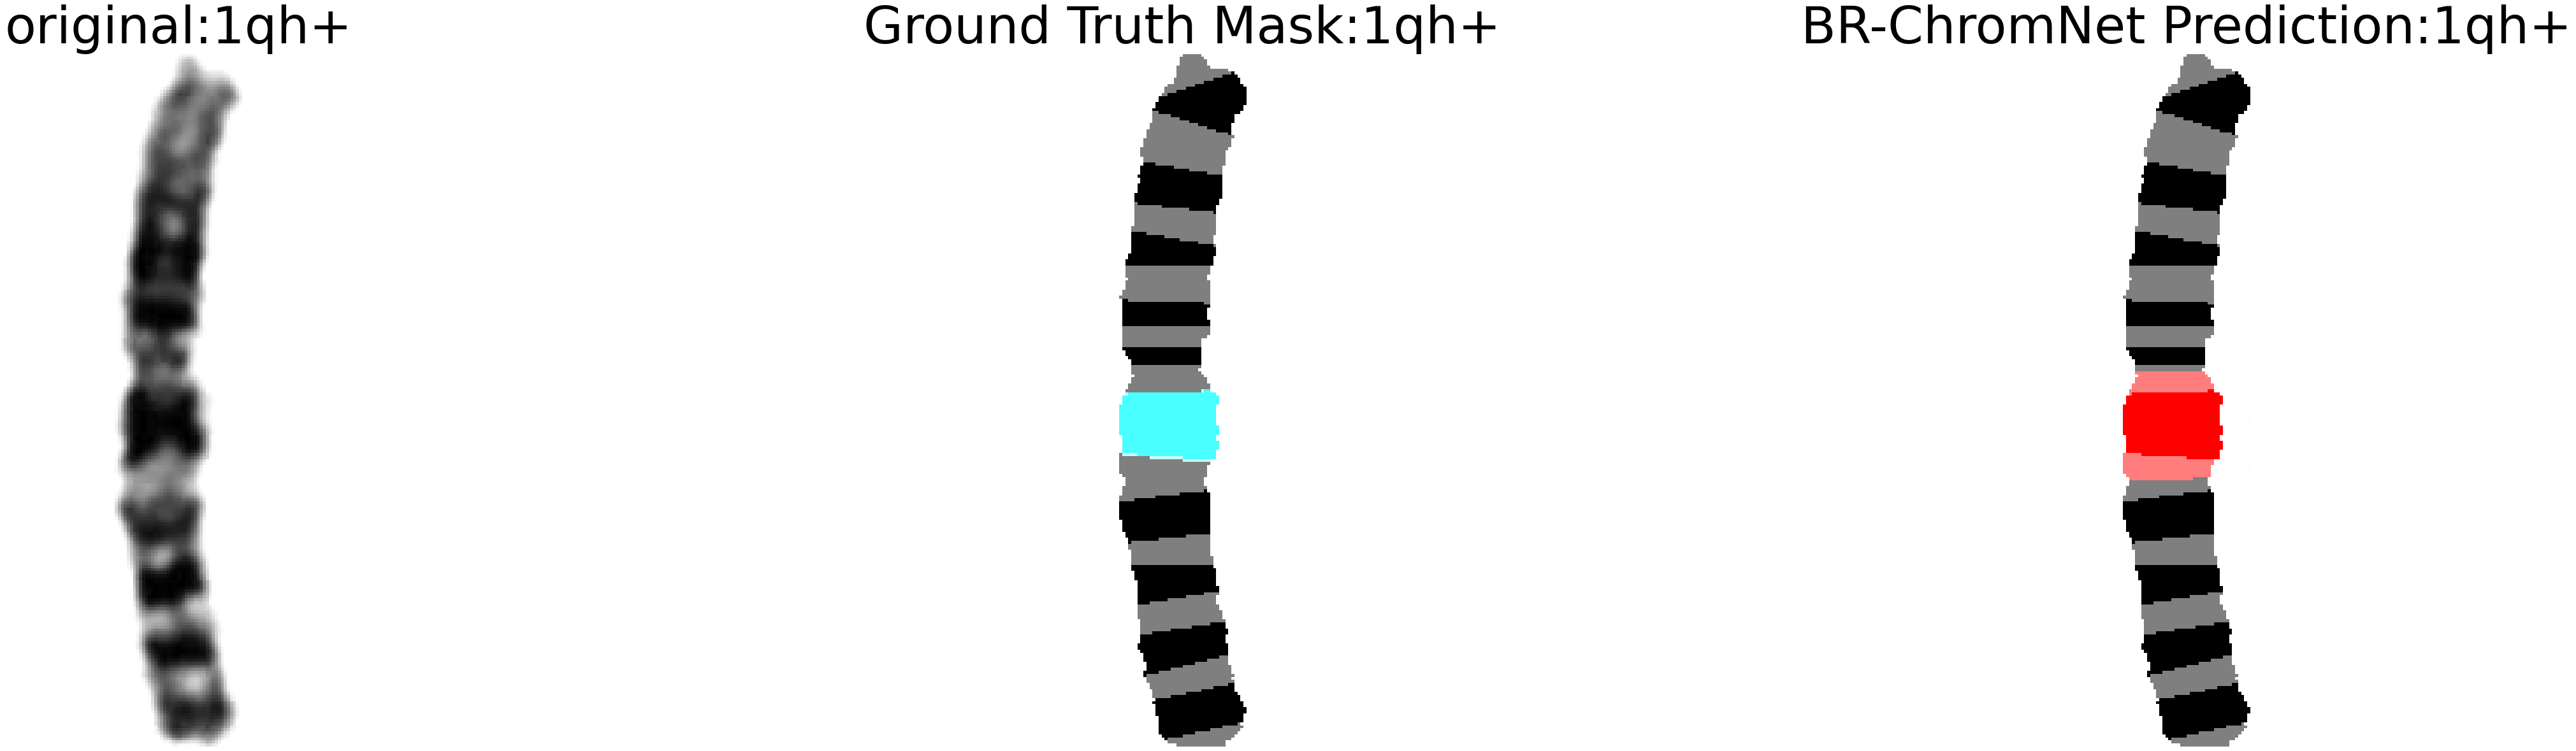

In [8]:
test_abnormal_imgs = []

for img_id in os.listdir('data/{}/abnormal/'.format(abnormal_type)):
    test_abnormal_imgs.append(img_id)

for test_img in test_abnormal_imgs:   
    
    if '.npy' in test_img:
        continue
    
    original_img = cv2.imread('data/{}/abnormal/{}'.format(abnormal_type,test_img),0)
    mask_img_file = 'data/{}/abnormal/{}'.format(abnormal_type,test_img.replace(".png", ".npy"))
    maskpred_file = 'inference-output/{}/abnormal/{}'.format(abnormal_type,test_img.replace(".png", ".npy"))
    
    gt_mask =  np.load(mask_img_file)
    mask = np.load(maskpred_file)
    # Resize the image using OpenCV
    
    segmentation = get_segmented_chromosome(original_img)
    color_gt = color_segmentation(segmentation, gt_mask, gt_color)
    color_pred = color_segmentation(segmentation, mask, (255,0,0))
    
    
    # Visualization
    fig, axes = plt.subplots(1, 3, figsize=(80, 20), sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(original_img, cmap=plt.cm.gray)
    ax[0].set_title('Image:{}'.format(abnormal_type) ,fontsize=80)
    ax[0].axis('off')
    
    ax[1].imshow(color_gt, cmap=plt.cm.gray)
    ax[1].set_title('Ground Truth Mask:{}'.format(abnormal_type),fontsize=80)
    ax[1].axis('off')
    
    ax[2].imshow(color_pred, cmap=plt.cm.gray)
    ax[2].set_title('BR-ChromNet Prediction:{}'.format(abnormal_type),fontsize=80)
    ax[2].axis('off')
    
    plt.show()


## Visualize Normal Samples

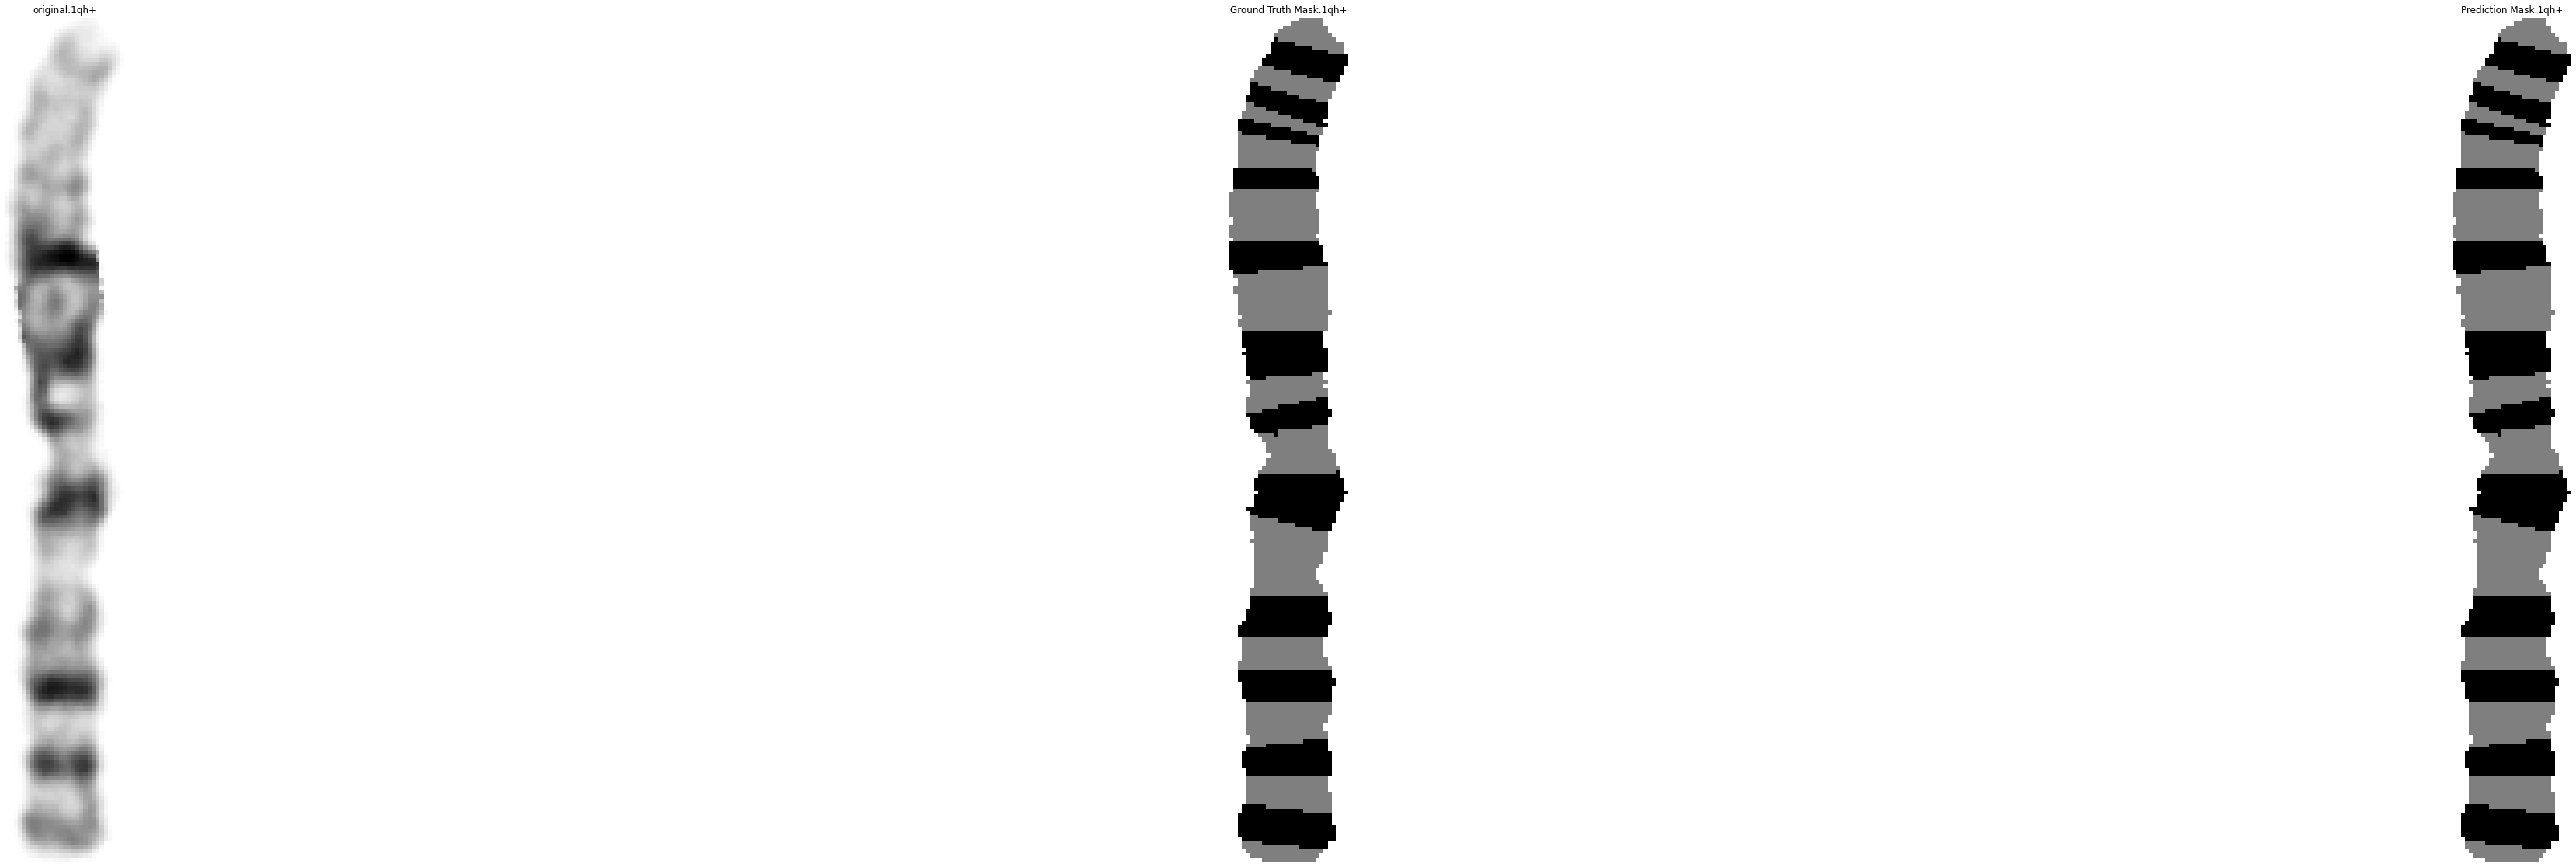

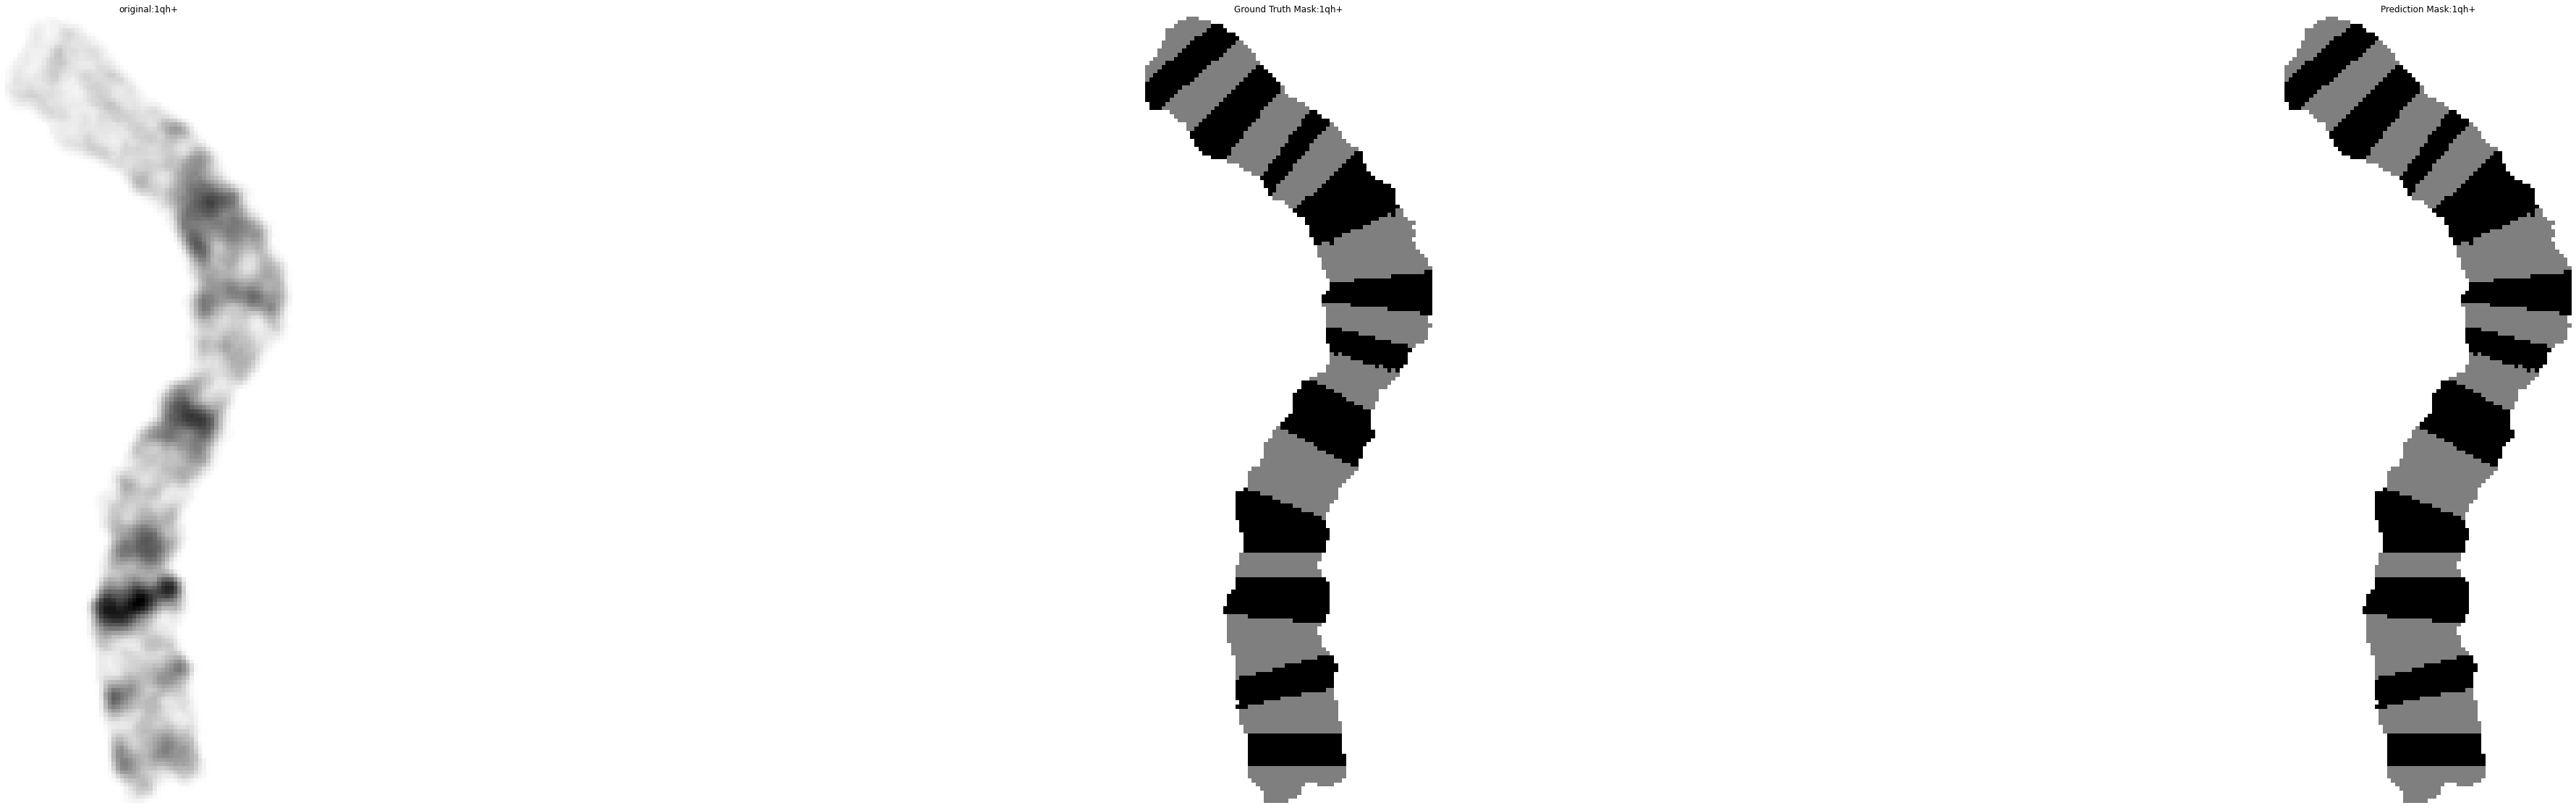

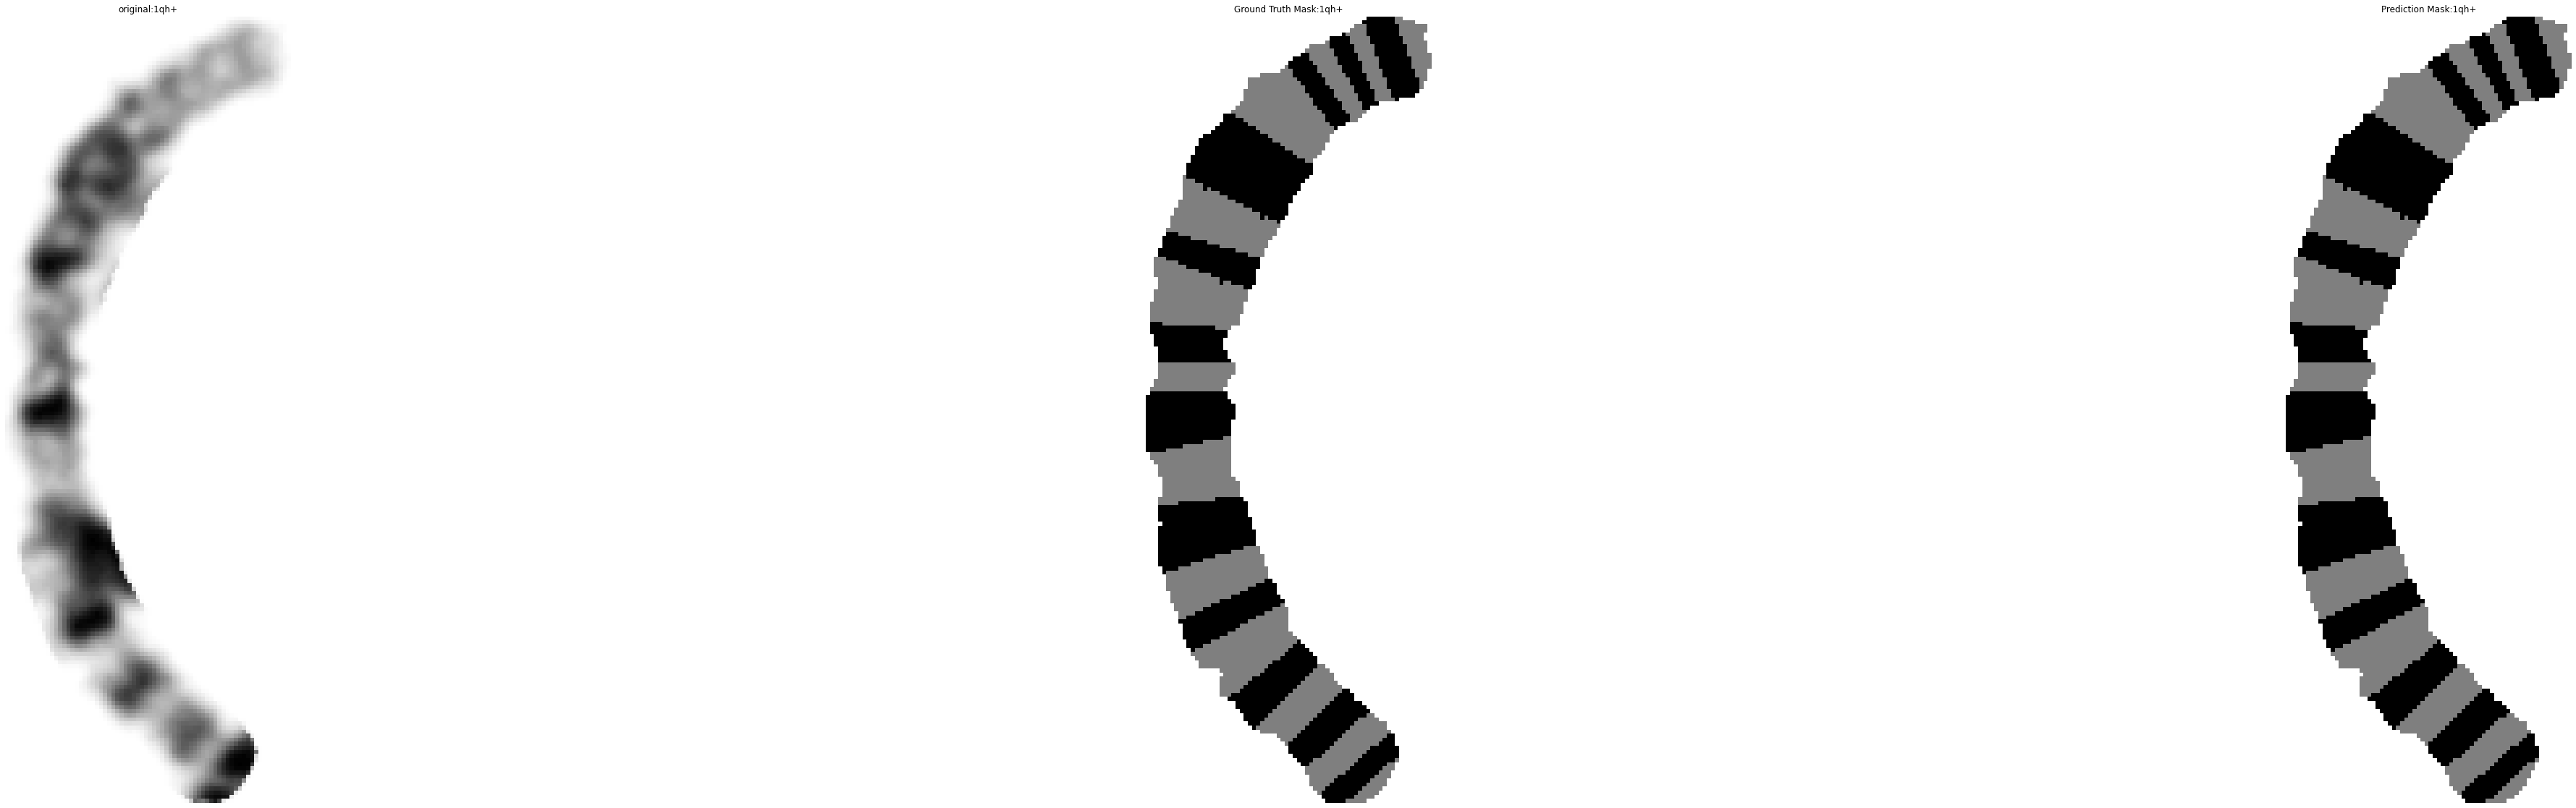

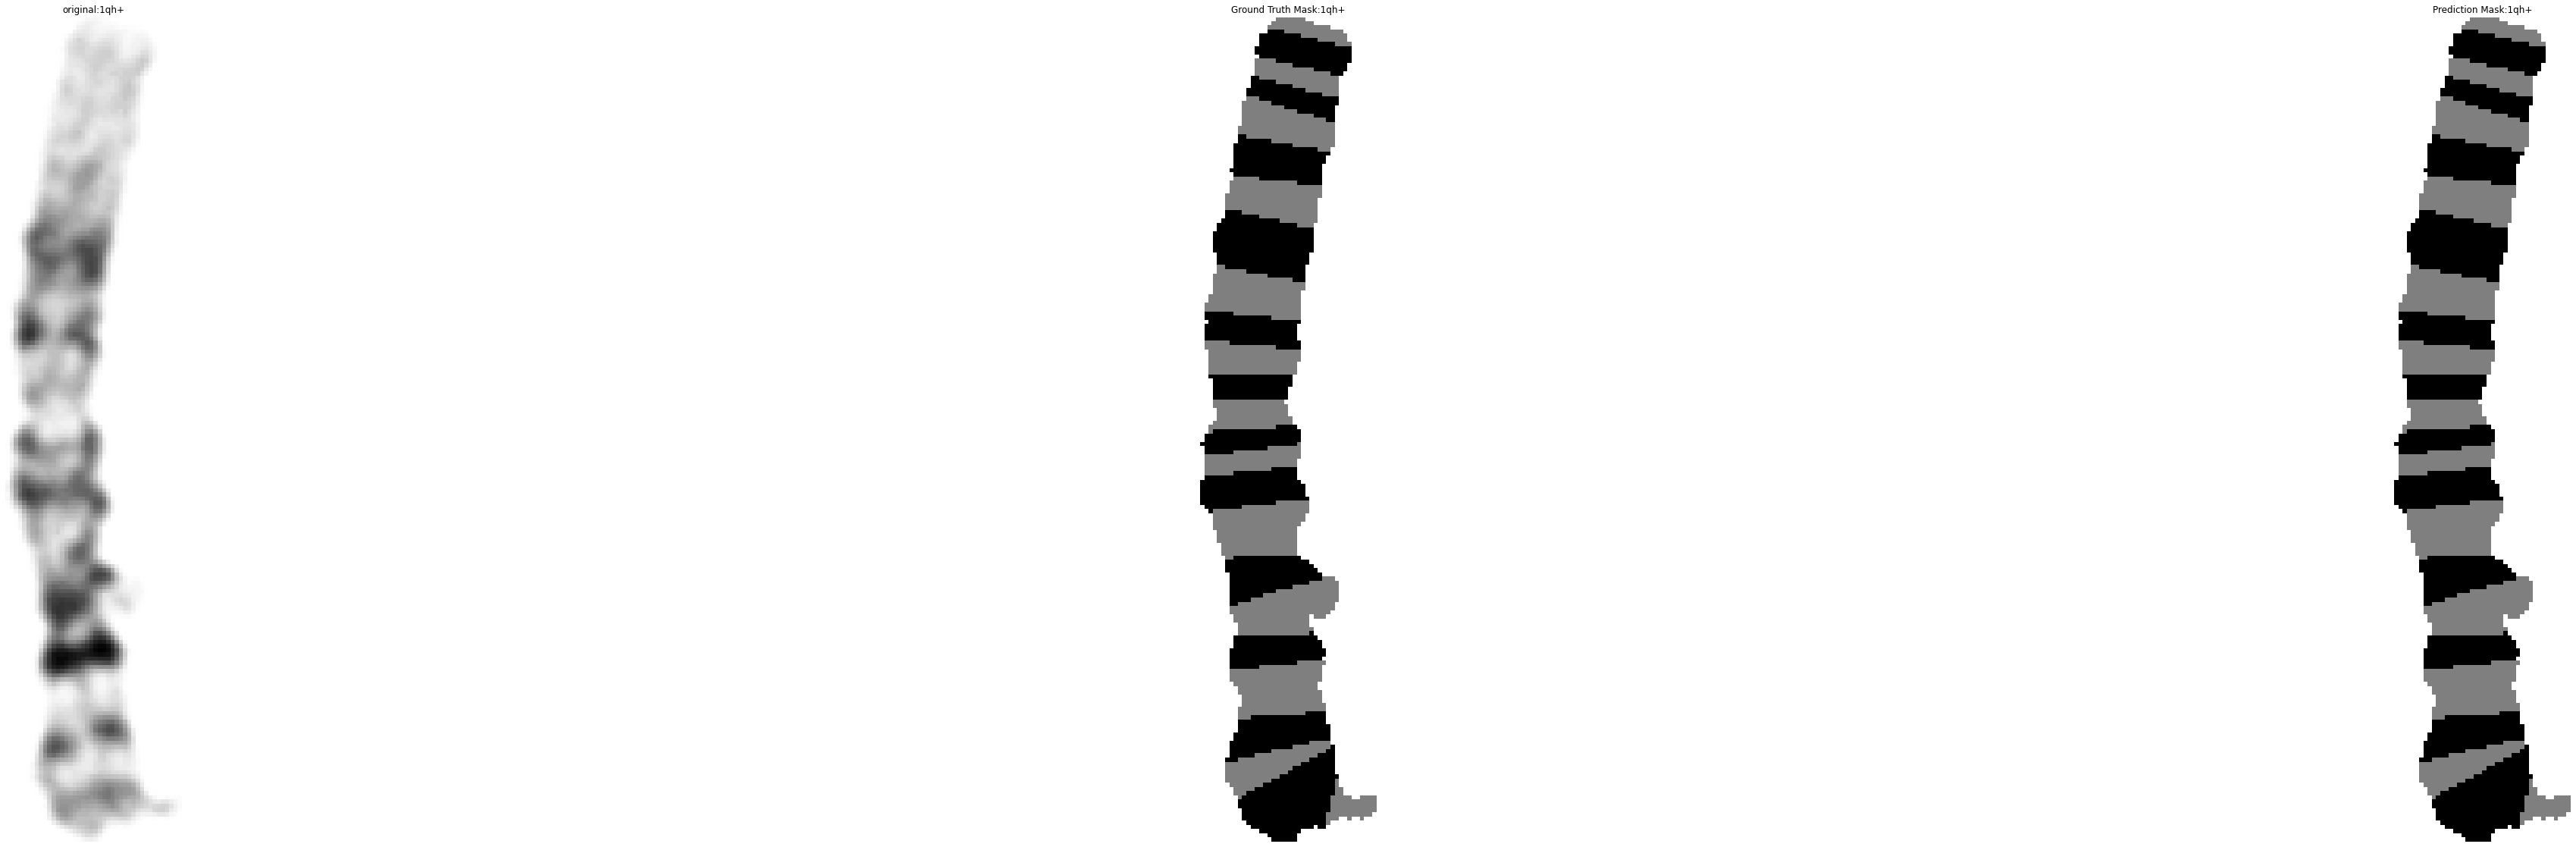

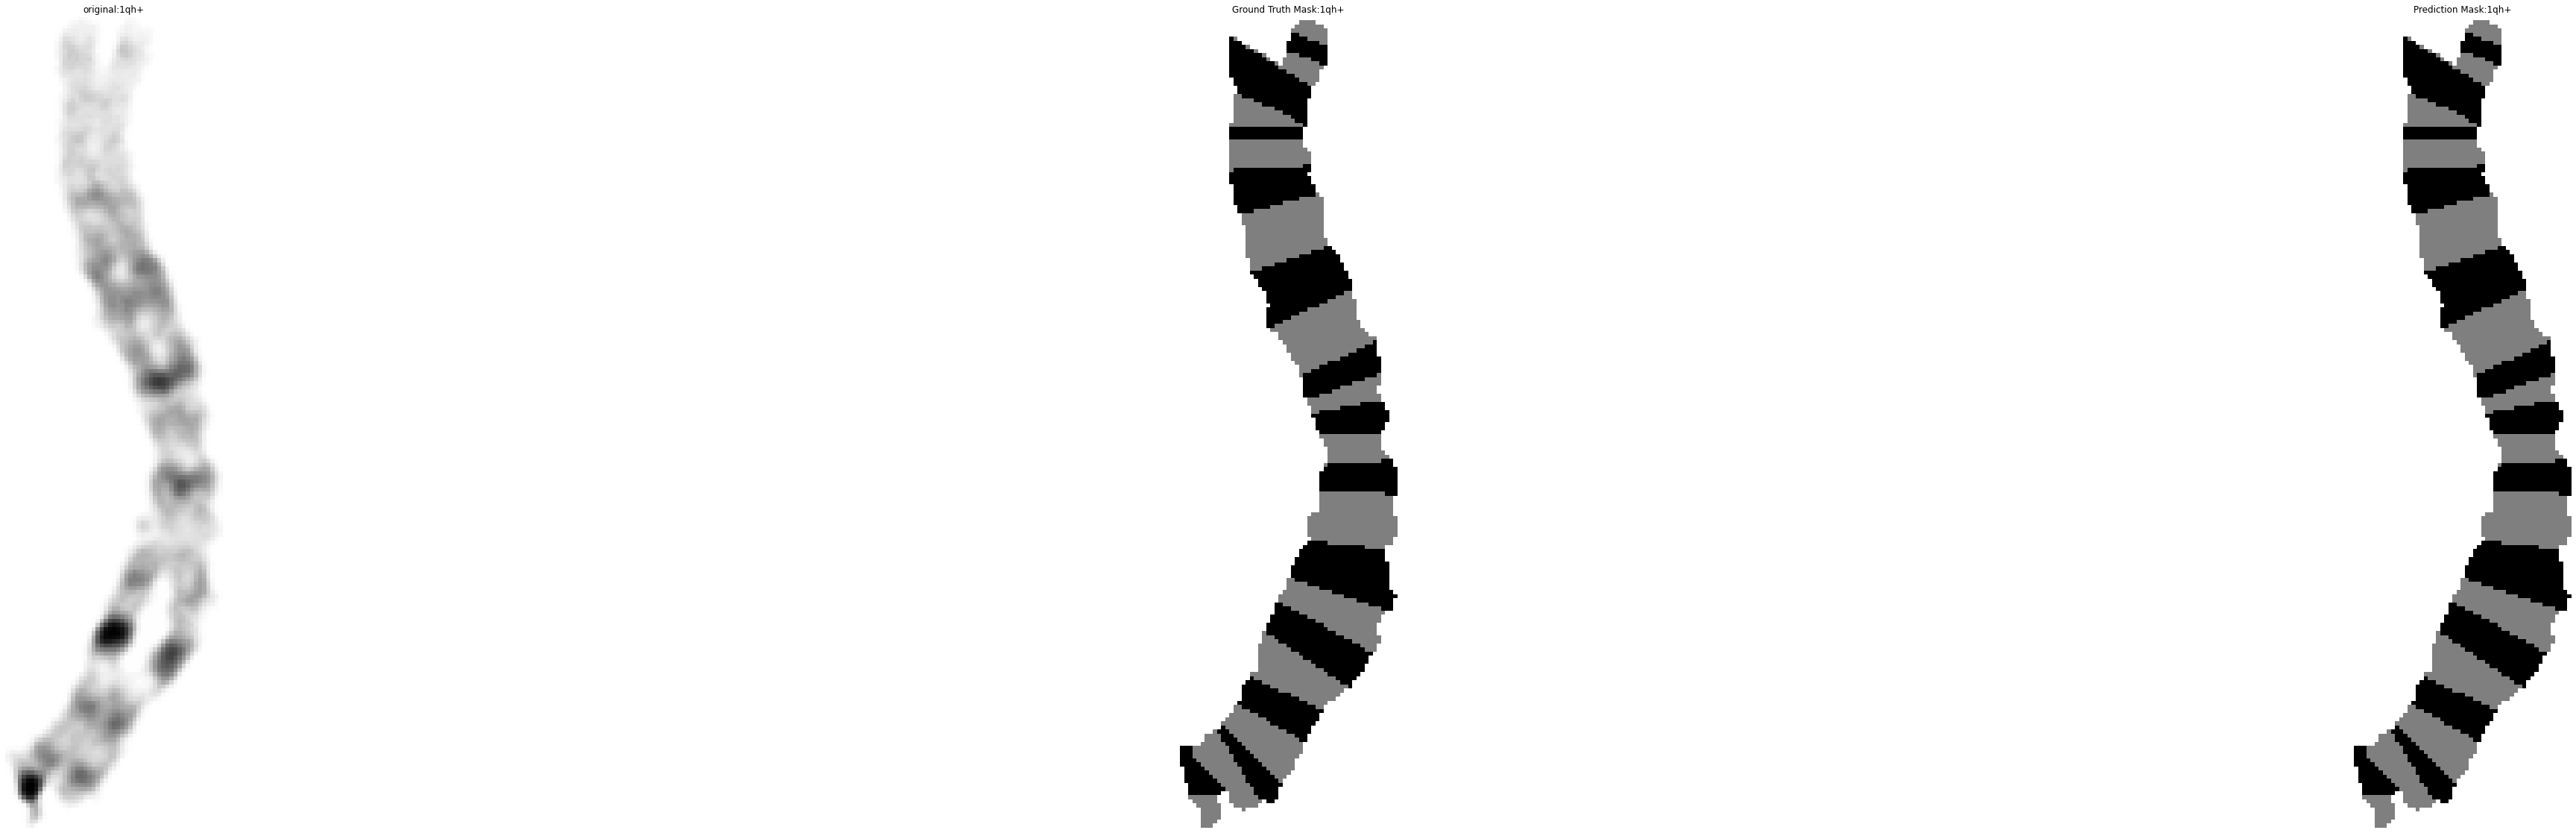

In [5]:
test_normal_imgs = []

for img_id in os.listdir('data/{}/normal/'.format(abnormal_type)):
    test_normal_imgs.append(img_id)

for test_img in test_normal_imgs:   
    
    if '.npy' in test_img:
        continue
    
    original_img = cv2.imread('data/{}/normal/{}'.format(abnormal_type,test_img),0)
    mask_img_file = 'data/{}/normal/{}'.format(abnormal_type,test_img.replace(".png", ".npy"))
    maskpred_file = 'inference-output/{}/normal/{}'.format(abnormal_type,test_img.replace(".png", ".npy"))
    
    gt_mask =  np.load(mask_img_file)
    mask = np.load(maskpred_file)
    # Resize the image using OpenCV
    
    segmentation = get_segmented_chromosome(original_img)
    color_gt = color_segmentation(segmentation, gt_mask, gt_color)
    color_pred = color_segmentation(segmentation, mask, (255,0,0))
    
    
    # Visualization
    fig, axes = plt.subplots(1, 3, figsize=(80, 20), sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(original_img, cmap=plt.cm.gray)
    ax[0].set_title('original:{}'.format(abnormal_type))
    ax[0].axis('off')
    
    ax[1].imshow(color_gt, cmap=plt.cm.gray)
    ax[1].set_title('Ground Truth Mask:{}'.format(abnormal_type))
    ax[1].axis('off')
    
    ax[2].imshow(color_pred, cmap=plt.cm.gray)
    ax[2].set_title('Prediction Mask:{}'.format(abnormal_type))
    ax[2].axis('off')
    
    plt.show()
